TO DO LIST:
1. Train test split<br>
We need to use about 80% of the data to discover patterns and train our model, and use the rest to test the performance of our models and feature selection steps. 
2. Log transform for continuous features. 
As notes in Sifei Lu et al, 2017, "A hybrid regression technique for house prices prediction" (https://ieeexplore.ieee.org/abstract/document/8289904?casa_token=5PM1GErvd1kAAAAA:6cmVTKBnJLFo0nKD6Rdywz3oFSOnpNmRoImRTfZFGcCH46m9X0zomUi4lfq3iCxmzOZeAb2_yg). In house price prediction, log transformation on continuous features may improve our models.<br>
3. Sequential feature selection: a common methods for posterior feature selection, as mentioned by "A survey on feature selection methods" (https://www.sciencedirect.com/science/article/pii/S0045790613003066?casa_token=RIVX1QVHWPoAAAAA:gHtK3StTaL7NXeRDQec6qG7zH6AYrt5VF2kUTAnS54yhn1I8fQUtBITL9xB8Yjm-RXhtCFhwEpA)<br>
4. PCA Analysis:<br>

For methods 2, we will verify the improvement through correlation via heatmap plot<br>
For methods 3, we will test on keeping 80%, 90%, whole features and compare performance of simple models for these features on train/test dataset. <br>
For methods 4, we will do the test again to show if PCA is effective. <br>

In [29]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

## Load the cleaned dataset

In [30]:
data = pd.read_csv("https://raw.githubusercontent.com/DianaWyy/Team45/feature_selection/cleaned_data_1.csv?token=AM75LUKWKF6R2F7DCGL4BDC7TNNFY", header=0, index_col=0)
data.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_length,minumum_nights
0,0.0,107,0.000297,-0.000541,0.0,149,1,0.000002,0.000044,0.002668,0.999992,34,0.002740
1,0.0,126,0.000312,-0.000567,1.0,225,1,0.000003,0.000015,0.002720,0.999992,21,0.002817
2,0.0,93,0.000298,-0.000541,0.0,150,3,0.000000,0.000007,0.002669,0.999962,35,0.008219
3,0.0,41,0.000611,-0.001111,1.0,89,1,0.000070,0.000015,0.002915,0.999982,31,0.005155
4,0.0,61,0.047474,-0.086042,1.0,80,10,0.000116,0.001164,0.000000,0.000000,48,0.995159


## Log transformation, shuffle the data and do train - test split

In [31]:

data["log_minimum_night"] = np.log(data["minimum_nights"] + 10**-15)
data["log_number_of_reviews"] = np.log(data["number_of_reviews"] + 10**-15)
data["log_review_per_month"] = np.log(data["reviews_per_month"] + 10**-15)
data["log_calculated_host_count"] = np.log(data["calculated_host_listings_count"] + 10**-15)
data["log_availability"] = np.log(data["availability_365"] + 10**-15)
data["log_name_length"] = np.log(data["name_length"] + 10**-15)
data["log_minumum_night"] = np.log(data["minumum_nights"] + 10**-15)
data = data.sample(n=data.shape[0])


In [32]:
data.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_length,minumum_nights,log_minimum_night,log_number_of_reviews,log_review_per_month,log_calculated_host_count,log_availability,log_name_length,log_minumum_night
29505,0.0,159,0.000423,-0.000766,1.0,45,3,0.000038,0.000010,0.003158,0.999946,37,0.009868,1.098612e+00,-10.180145,-11.474872,-5.757845,-0.000054,3.610918,-4.618469
17545,0.0,159,0.003729,-0.006754,0.0,85,1,0.000013,0.000092,0.008153,0.999874,17,0.011235,1.110223e-15,-11.264174,-9.298061,-4.809425,-0.000126,2.833213,-4.488762
27006,0.0,94,0.001113,-0.002020,0.0,91,1,0.000043,0.000082,0.004943,0.999970,41,0.005525,1.110223e-15,-10.044645,-9.409767,-5.309882,-0.000030,3.713572,-5.198527
3468,0.0,28,0.150581,-0.273470,1.0,60,3,0.000777,0.003700,0.000000,0.000000,23,0.950013,1.098612e+00,-7.160172,-5.599524,-34.538776,-34.538776,3.135494,-0.051279
45626,0.0,205,0.092905,-0.168126,0.0,129,1,0.000000,0.002274,0.011370,0.962253,22,0.192451,1.110223e-15,-34.538776,-6.086190,-4.476752,-0.038478,3.091042,-1.647916


In [33]:
#featureX = data[["neighbourhood_group", "neighbourhood", "latitude", "longitude", "room_type", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "name_length", "minimum_nights", "log_minimum_night", "log_number_of_reviews", "log_number_of_reviews", "log_review_per_month", "log_calculated_host_count", "log_calculated_host_count", "log_availability", "log_name_length"]]
featureY = data[["price"]]
featureX = data.drop(columns = "price")
x_train, x_test, y_train, y_test = train_test_split(featureX, featureY, test_size=0.2, random_state=42)


In [34]:
y_train.head()


,price
28794,225
1214,70
24234,167
12008,99
2693,100


## Heatmap on correlation for train data

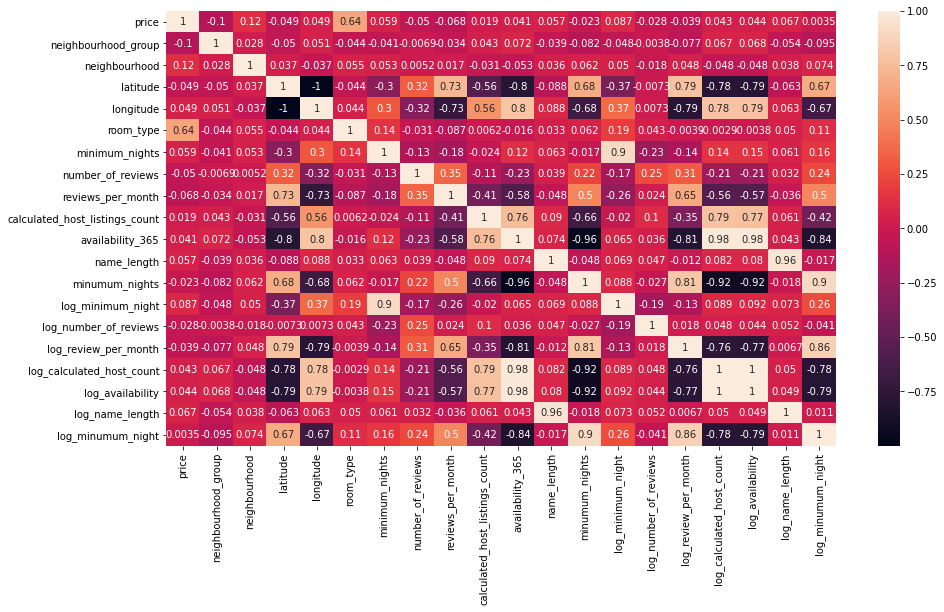

In [35]:
frame = [y_train, x_train]
traindata = pd.concat(frame, axis = 1)
traindata.head(5)
corr = traindata.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

### We notice that after applying log transformation, the absolute value of correlation may increase for some features. The features that performs better on log transformation are different for different train-test-split runs. However, Common features that performs better on log_transformations are "minimum_night", "calculated_host_litings_count" and "name_length"

## Sequential feature selection from sklearn by lasso regression: 
test on 75%, 90%, 100% of features on train and test data. The result can be shown in table. 


In [36]:

# Construct of selector models
lasso = linear_model.Lasso(alpha=0.5)
sfs1 = RFE(lasso, n_features_to_select=int(0.9*x_train.shape[1]))
sfs2 = RFE(lasso, n_features_to_select=int(0.75*x_train.shape[1]))
sfs1.fit(x_train, y_train)
sfs2.fit(x_train, y_train)

# transform
xtrain_90 = sfs1.transform(x_train)
xtrain_75 = sfs2.transform(x_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
sfs1.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [38]:
sfs2.support_

array([ True,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [39]:
x_test_75 = sfs2.transform(x_test)
x_test_90 = sfs1.transform(x_test)

In [40]:
# Testing on 75% of the data
lasso1 = linear_model.Lasso(alpha=0.5).fit(xtrain_75, y_train)
predicted_75 = lasso1.predict(x_test_75)
loss_75 = mean_squared_error(predicted_75, y_test)
loss_75

1643.3550607321804

In [41]:
# Testing on 90% of the data
lasso2 = linear_model.Lasso(alpha=0.5).fit(xtrain_90, y_train)
predicted_90 = lasso2.predict(x_test_90)
loss_90 = mean_squared_error(predicted_90, y_test)
loss_90

1643.3550430672497

In [42]:
# Test on the whole data
lasso3 = linear_model.Lasso(alpha=0.5).fit(x_train, y_train)
predicted = lasso3.predict(x_test)
loss = mean_squared_error(predicted, y_test)
loss

1643.3549894392668

### We notice that the mse loss is different for different train-test-split runs. Thus, we make the table for our sampled 5 runs to get which might be better:
<table>
<tr>
  <th>Trial</th><th>75% of feature (mse error)</th><th>90% of feature (mse error)</th><th>100% of feature (mse error)</th><th>best(percent retained)</th></tr>

<tr>
<th>1</th>
<th>1650.5907500207677</th>
<th>1650.5908190303974</th>
<th>1650.5910735995328</th>
<th>75</th></tr><tr>
<th>2</th>
<th>1598.7247182731764</th>
<th>1598.724711739087</th>
<th>1598.7246732934193</th>
<th>100</th></tr><tr>
<th>3</th>
<th>1651.2238928651923</th>
<th>1651.2238679102115</th>
<th>1651.2237966863613</th>
<th>100</th></tr><tr>
<th>4</th>
<th>1649.2040389298475</th>
<th>1649.2040272837903</th>
<th>1649.2040161540663</th>
<th>100</th></tr><tr>
<th>5</th>
<th>1630.9719244553812</th>
<th>1630.9718826369053</th>
<th>1630.971763588842</th>
<th>100</th></tr></table>
Thus, eliminate any feature might be harmful to lasso regression model. We could also assume and guess that eliminate any features will lead to bad performance of other models as well. 

## PCA Analysis
test on test data for keeping whole dimension, 60% of the dimension 80% of the dimension and do not applied transformation. The result can be shown in a table


In [43]:
# The principal components are chosen such that 50% of the variance is retained
pca_5 = PCA(n_components = int(0.5*(x_train.shape[1]))).fit(x_train)

# Transform on the train and testing data, do a simple regression on testing
x_train_5_p = pca_5.transform(x_train)
x_test_5_p = pca_5.transform(x_test)
lasso_5_p = linear_model.Lasso(alpha=0.5).fit(x_train_5_p, y_train)
mean_squared_error(lasso_5_p.predict(x_test_5_p), y_test)

1648.7566654420489

In [44]:
# y = traindata["price"]
# x = traindata.drop(columns = "price")
# traindata = StandardScaler().fit_transform(x)

# The principal components are chosen such that 60% of the variance is retained
pca_6 = PCA(n_components = int(0.6*(x_train.shape[1]))).fit(x_train)

# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10','principal component 11' ])
# array1 = pca.explained_variance_ratio_
# sum = 0
# for i in array1:
  # sum = sum + i
# sum

# Transform on the train and testing data, do a simple regression on testing
x_train_6_p = pca_6.transform(x_train)
x_test_6_p = pca_6.transform(x_test)
lasso_6_p = linear_model.Lasso(alpha=0.5).fit(x_train_6_p, y_train)
mean_squared_error(lasso_6_p.predict(x_test_6_p), y_test)

1641.0821302697232

In [45]:
# The principal components are chosen such that 80% of the variance is retained
pca_8 = PCA(n_components = int(0.8*(x_train.shape[1]))).fit(x_train)

# Transform on the train and testing data, do a simple regression on testing
x_train_8_p = pca_8.transform(x_train)
x_test_8_p = pca_8.transform(x_test)
lasso_8_p = linear_model.Lasso(alpha=0.5).fit(x_train_8_p, y_train)
mean_squared_error(lasso_8_p.predict(x_test_8_p), y_test)

1641.0821302697232

In [46]:
# y = traindata["price"]
# x = traindata.drop(columns = "price")
# traindata = StandardScaler().fit_transform(x)
# the principal components are chosen such that 100% of the variance is retained
pca = PCA().fit(x_train)

# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10' ])
# array1 = pca.explained_variance_ratio_
# sum = 0
# for i in array1:
  # sum = sum + i
# sum

# transform and test
x_train_p = pca.transform(x_train)
x_test_p = pca.transform(x_test)
lasso_p = linear_model.Lasso(alpha=0.5).fit(x_train_p, y_train)
mean_squared_error(lasso_p.predict(x_test_p), y_test)

1641.082130269723

<table>
<tr>
<th>Trials</th>
<th>PCA (mse error)</th>
<th>PCA 50% (mse error)</th>
<th>PCA 60% (mse error)</th>
<th>PCA 80% (mse error)</th>
<th> no PCA (mse error)</th>
</tr>
<tr>
<th>1</th>
<th>1658.6217503116238</th>
<th>1666.7211666367061</th>
<th>1658.6217503116238</th>
<th>1658.6217503116238</th>
<th>1662.4387964994773</th>
</tr>
<tr>
<th>2</th>
<th>1636.229643020161</th>
<th>1642.7919251311662</th>
<th>1636.229643020161</th>
<th>1636.229643020161</th>
<th>1638.5372346968588</th>
</tr>
<tr>
<th>3</th>
<th>1596.5187485464774</th>
<th>1604.2044477066956</th>
<th>1596.5187485464774</th>
<th>1596.5187485464774</th>
<th>1600.424106745925</th>
</tr>
</table>
We found that applying PCA to the dataset will improve prediction score if PCA retain at least 60% of the axis (actually, they get the same improved score). By "Occam's razor", we will keep 60% of the transformed features for further supervised and unsupervised learning task. 

# Conclusion
1. We need to apply log transformation to continuous features. 
2. The sequential Selector's test found that we should retain all of its features.<br>
3. The PCA test gives that we should do PCA analysis and retain 60% of the axis.

# To do:
Generate train_x, test_x, train_y, test_y based on the conclusion we found. 

In [47]:
# We need to check if the rows are matched after concatenate. So we print out it here. 
y_train.head(5)

,price
28794,225
1214,70
24234,167
12008,99
2693,100


In [48]:
x_train.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_length,minumum_nights,log_minimum_night,log_number_of_reviews,log_review_per_month,log_calculated_host_count,log_availability,log_name_length,log_minumum_night
28794,0.0,144,0.067949,-0.123466,1.0,7,1.334836e-04,0.001669,0.000000,0.000000,34,0.990018,1.945910e+00,-8.921532,-6.395803,-34.538776,-34.538776,3.526361,-0.010032
1214,0.0,165,0.015135,-0.027480,1.0,30,1.487363e-05,0.000372,0.000000,0.000000,29,0.999508,3.401197e+00,-11.115921,-7.897045,-34.538776,-34.538776,3.367296,-0.000492
24234,0.0,158,0.000370,-0.000674,1.0,3,1.730458e-06,0.000009,0.002969,0.999953,50,0.009202,1.098612e+00,-13.267125,-11.606393,-5.819496,-0.000047,3.912023,-4.688332
12008,0.0,213,0.340653,-0.618849,0.0,1,1.004037e-03,0.008367,0.000000,0.000000,33,0.707750,1.110223e-15,-6.903727,-4.783463,-34.538776,-34.538776,3.496508,-0.345664
2693,0.0,31,0.000379,-0.000689,1.0,30,5.583691e-07,0.000009,0.002987,0.995656,49,0.093052,3.401197e+00,-14.398246,-11.584835,-5.813394,-0.004353,3.891820,-2.374597


In [49]:
pca_final = PCA(n_components=int(0.6 * x_train.shape[1])).fit(x_train)
x_train_final = pca_final.transform(x_train)
# testing later to check if rows match
x_train_test = pca_final.transform(x_train[:3])
x_train_test

array([[ 3.99361722e+01,  2.76779008e+01,  3.37590497e+00,
        -1.84875063e+00, -5.12197465e+00, -9.15963776e-01,
        -8.26542731e-01,  3.07107770e-01,  3.64030180e-01,
        -1.35677390e-01, -1.28751772e-02],
       [ 6.10606672e+01,  2.59953975e+01, -8.83060207e+00,
        -7.24542483e-01, -2.51102700e+01, -2.84372706e+00,
         1.48302092e-01,  3.25306816e-01, -3.35954595e-01,
        -5.65933463e-01, -2.54959951e-02],
       [ 5.32194404e+01, -1.82532219e+01,  5.58383312e+00,
         1.04215665e+01,  5.41145263e+00, -2.84081303e+00,
        -7.89823216e-01,  4.14072884e-01,  4.67852925e-03,
         1.98417811e-01, -2.30927920e-02]])

In [50]:
train_dataset = np.concatenate([x_train_final, y_train], axis=1)
column_names_p = ["pca_component " + str(i) for i in range(x_train_final.shape[1])]
column_names_p.append("price")
train_dataset = pd.DataFrame(train_dataset, columns=column_names_p)
train_dataset.head()

,pca_component 0,pca_component 1,pca_component 2,pca_component 3,pca_component 4,pca_component 5,pca_component 6,pca_component 7,pca_component 8,pca_component 9,pca_component 10,price
0,39.936172,27.677901,3.375905,-1.848751,-5.121975,-0.915964,-0.826543,0.307108,0.364030,-0.135677,-0.012875,225.0
1,61.060667,25.995397,-8.830602,-0.724542,-25.110270,-2.843727,0.148302,0.325307,-0.335955,-0.565933,-0.025496,70.0
2,53.219440,-18.253222,5.583833,10.421566,5.411453,-2.840813,-0.789823,0.414073,0.004679,0.198418,-0.023093,167.0
3,108.872261,27.047506,7.433926,-5.313896,-0.262049,0.343956,0.789349,-0.326248,-0.390056,0.136451,-0.027082,99.0
4,-73.573315,-17.684167,-6.493019,17.385636,-19.063667,-2.370414,-0.635214,0.233080,-0.733382,0.177360,0.009243,100.0


In [51]:
train_dataset.to_csv("train5.csv", header=True, index=True)

In [52]:
y_test.head(3)

,price
37907,45
47477,150
10250,45


In [53]:
x_test.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_length,minumum_nights,log_minimum_night,log_number_of_reviews,log_review_per_month,log_calculated_host_count,log_availability,log_name_length,log_minumum_night
37907,0.0,28,0.000511,-0.000928,0.0,3,0.000007,0.000038,0.003464,0.999934,40,0.010869,1.098612e+00,-11.865581,-10.187150,-5.665362,-0.000066,3.688879,-4.521854
47477,0.0,201,0.022153,-0.040181,0.0,2,0.001629,0.000543,0.011406,0.994381,48,0.094703,6.931472e-01,-6.419492,-7.518104,-4.473582,-0.005635,3.871201,-2.357010
10250,0.0,51,0.340703,-0.619501,0.0,1,0.000168,0.008377,0.000000,0.000000,35,0.707156,1.110223e-15,-8.694272,-4.782249,-34.538776,-34.538776,3.555348,-0.346503


In [54]:
x_test_test = pca_final.transform(x_test[:3])
x_test_test

array([[-7.68143385e+01, -1.55945207e+01,  3.35812365e+00,
         1.80159433e+00,  2.86095528e+00, -1.39753407e+00,
        -2.63729874e-02, -4.07861674e-01,  3.27574899e-01,
         1.48437734e-01, -3.30312758e-02],
       [ 9.61714209e+01, -1.93137584e+01,  1.15003273e+01,
         6.42661320e+00,  3.20341889e+00,  1.91609528e+00,
        -1.35706403e-01, -5.52134432e-01, -1.57779486e-01,
        -1.96213662e-01, -4.04113729e-02],
       [-5.30804842e+01,  2.96753264e+01,  5.98113711e+00,
        -1.64746368e+00, -5.62359706e-02,  4.47351114e-01,
         7.36698762e-01, -2.78644057e-01, -4.15357574e-01,
         1.36732598e-01, -1.16236642e-02]])

In [55]:
x_test_final = pca_final.transform(x_test)
test_dataset = np.concatenate([x_test_final, y_test], axis=1)
test_dataset = pd.DataFrame(test_dataset, columns=column_names_p)
test_dataset.head()

,pca_component 0,pca_component 1,pca_component 2,pca_component 3,pca_component 4,pca_component 5,pca_component 6,pca_component 7,pca_component 8,pca_component 9,pca_component 10,price
0,-76.814339,-15.594521,3.358124,1.801594,2.860955,-1.397534,-0.026373,-0.407862,0.327575,0.148438,-0.033031,45.0
1,96.171421,-19.313758,11.500327,6.426613,3.203419,1.916095,-0.135706,-0.552134,-0.157779,-0.196214,-0.040411,150.0
2,-53.080484,29.675326,5.981137,-1.647464,-0.056236,0.447351,0.736699,-0.278644,-0.415358,0.136733,-0.011624,45.0
3,-76.707190,-16.748817,4.337665,12.083981,-5.041037,1.234883,-0.148719,-0.576247,0.616290,-0.018705,-0.008402,63.0
4,-2.052342,28.365399,7.958104,2.852007,-1.611771,-0.218779,-0.413748,0.439059,0.117139,-0.003720,-0.001167,150.0


In [56]:
test_dataset.to_csv("test5.csv", header=True, index=True)